### Poin-poin Assignment
1. Pilih Dataset House Price California (california_dataset.csv) atau dataset House Price (house_price.csv) Untuk kasus Regresi -> Pilih salah satu dataset saja (Wajib dikerjakan)
2. Jika ingin memilih dataset klasifikasi (dataset_1.csv) dengan kolom target bernama target, lakukan PCA dan bandingkan modelling tanpa PCA dan dengan PCA.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
#Model ML Regresi
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

#Evaluation Regresi -> tambahkan matrix yang lain jika dibutuhkan
from sklearn.metrics import mean_squared_error


#import model classification
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC #SVM
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.neighbors import KNeighborsClassifier #KNN
#import for metrics evaluasi klasifikasi
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

In [ ]:
# Regresi california_dataset

df1 = pd.read_csv("1700131614528-california_dataset (1).csv")
df1.shape

(20640, 9)

In [ ]:
# Regresi house_price

df2 = pd.read_csv("1700368072515-house_price.csv")
df2.shape

(1460, 81)

In [ ]:
# Klasifikasi dataset_1

df3 = pd.read_csv("dataset_1.csv")
df3.shape

(50000, 301)

In [ ]:
df3.target.value_counts() #variabel target (biner : 1 dan 0 -> klasifikasi)

0    48009
1     1991
Name: target, dtype: int64

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 301 entries, var_1 to target
dtypes: float64(127), int64(174)
memory usage: 114.8 MB


### Assignment 1
Dari 3 dataset diatas, pilih salah satu saja **(poin 10)**
1. Pahami dataset yang dipilih dengan cek dataset menggunakan : info(), sample(5), head(), tail() dan melihat value counts di tiap-tiap kolom.

In [ ]:
#Tambahkan cell jika dibutuhkan

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   house_price  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df1.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
17989,1.7171,17.0,5.155039,1.050388,408.0,1.581395,37.27,-121.95,1.813
3635,3.9615,37.0,4.879213,1.036517,1061.0,2.980337,34.23,-118.43,1.737
17083,3.1989,37.0,3.943820,0.996255,939.0,3.516854,37.47,-122.20,3.208
15720,3.7159,52.0,4.574830,0.989796,560.0,1.904762,37.78,-122.45,4.944
6118,2.2132,34.0,4.858044,1.034700,1037.0,3.271293,34.13,-117.91,1.385


In [ ]:
df1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df1.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [ ]:
for column in df1.columns:
    print(f"============= {column} =================")
    display(df1[column].value_counts())
    print()

============= MedInc =================


3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: MedInc, Length: 12928, dtype: int64


============= HouseAge =================


52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: HouseAge, dtype: int64


============= AveRooms =================


5.000000    27
4.500000    22
4.000000    21
6.000000    20
5.333333    13
            ..
3.532286     1
4.793919     1
4.964602     1
4.539088     1
5.254717     1
Name: AveRooms, Length: 19392, dtype: int64


============= AveBedrms =================


1.000000    288
1.125000     29
1.058824     26
1.100000     25
1.083333     25
           ... 
0.932886      1
0.906883      1
1.164894      1
1.030853      1
1.162264      1
Name: AveBedrms, Length: 14233, dtype: int64


============= Population =================


891.0     25
761.0     24
1227.0    24
1052.0    24
850.0     24
          ..
2141.0     1
5546.0     1
3186.0     1
3590.0     1
6912.0     1
Name: Population, Length: 3888, dtype: int64


============= AveOccup =================


3.000000    35
2.000000    18
2.500000    17
2.666667    16
2.333333    13
            ..
2.425926     1
2.942568     1
2.816254     1
2.837104     1
2.616981     1
Name: AveOccup, Length: 18841, dtype: int64


============= Latitude =================


34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
41.01      1
41.36      1
41.13      1
40.30      1
35.88      1
Name: Latitude, Length: 862, dtype: int64


============= Longitude =================


-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
          ... 
-123.54      1
-115.94      1
-115.99      1
-116.81      1
-123.71      1
Name: Longitude, Length: 844, dtype: int64


============= house_price =================


5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: house_price, Length: 3842, dtype: int64

Berdasarkan informasi data awal terlihat bahwa dataset memiliki fitur yang berupa numerik semua tanpa kategorikal, lalu terdapat kolom latitutde dan longitude yang kurang memberikan dampak untuk kasus regresi yang akan dilakukan oleh sebab itu dapat dilakukan drop pada kolom tersebut, lalu pada value count sekilas terlihat bahwa tidak ada nilai yang tidak sesuai pada kolomnya.

In [ ]:
df1.drop(['Latitude', 'Longitude'], axis=1, inplace=True) #drop latitude dan longtude
X = df1.drop('house_price', axis=1)
y = df1['house_price']

### Assignment 2 : Lakukan EDA untuk kolom numerik dan kategorikal, silahkan saudara eksplor. (Poin 15)

In [ ]:
#Tambahkan cell jika dibutuhkan

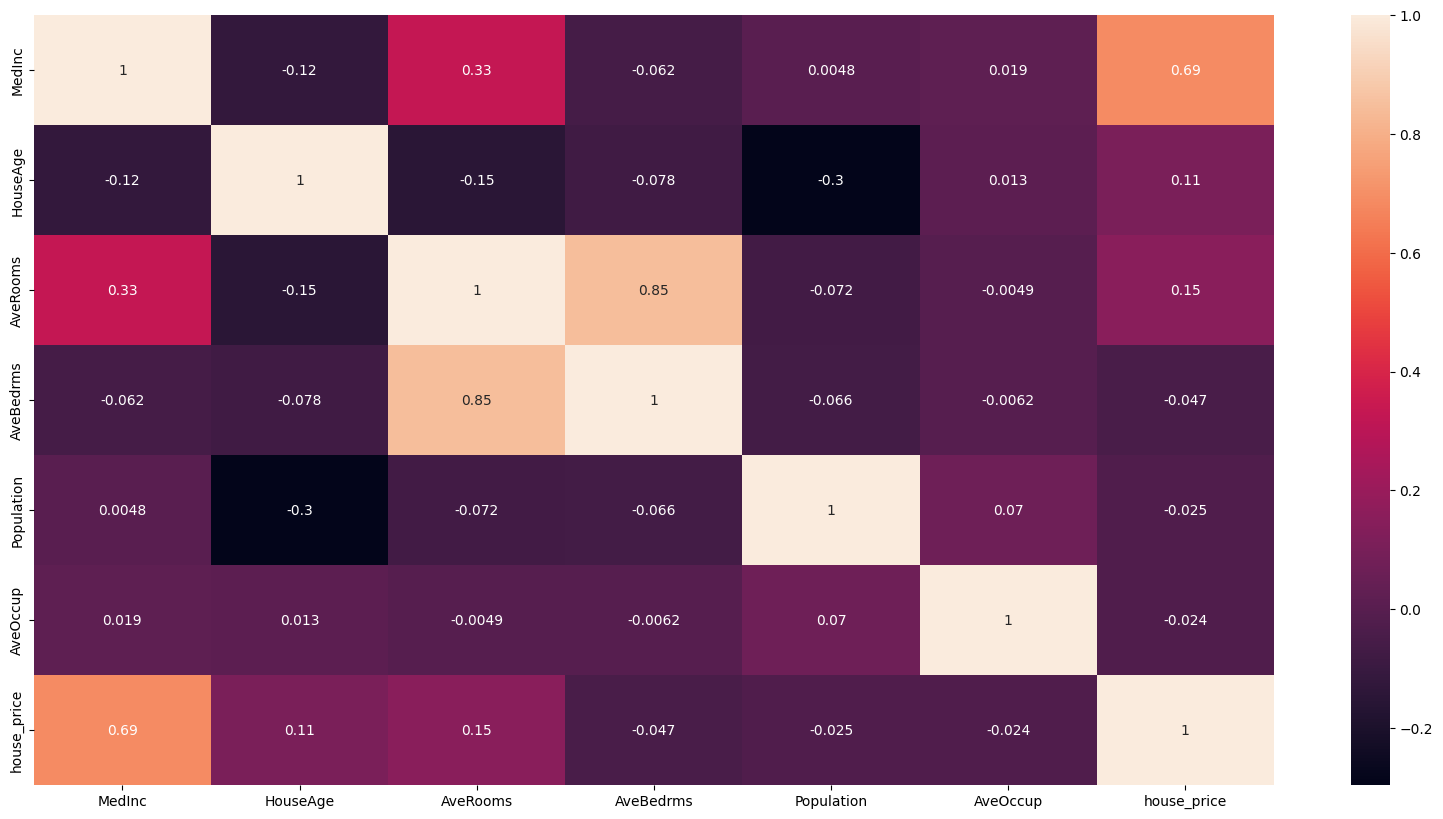

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot = True)
plt.show()

In [ ]:
df1.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,house_price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,5.000010


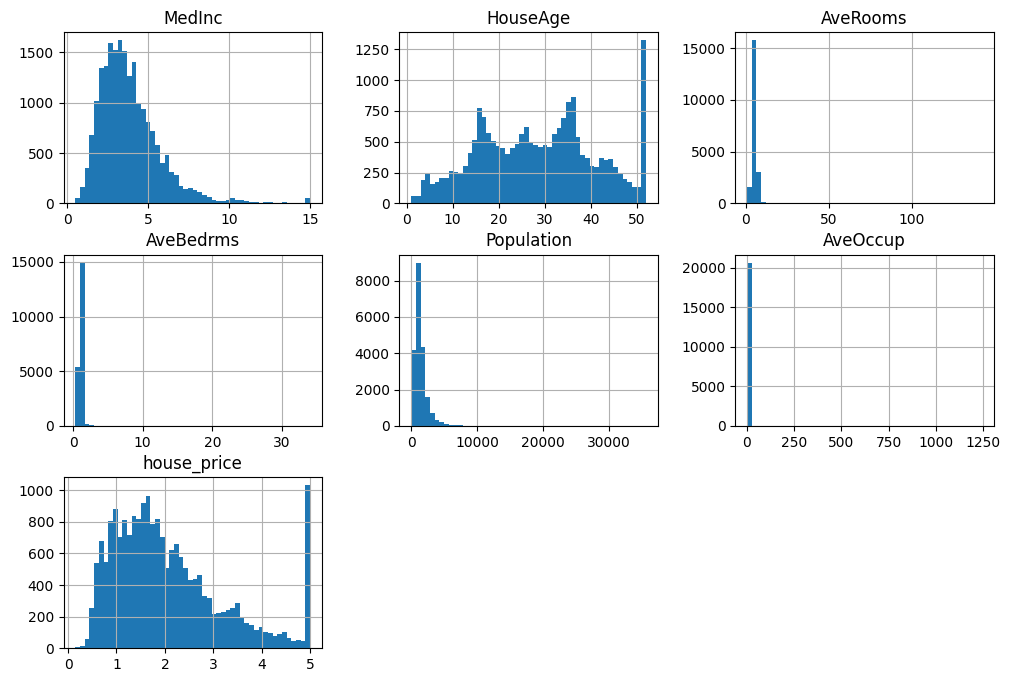

In [ ]:
df1.hist(bins=50, figsize=(12,8))
plt.show()

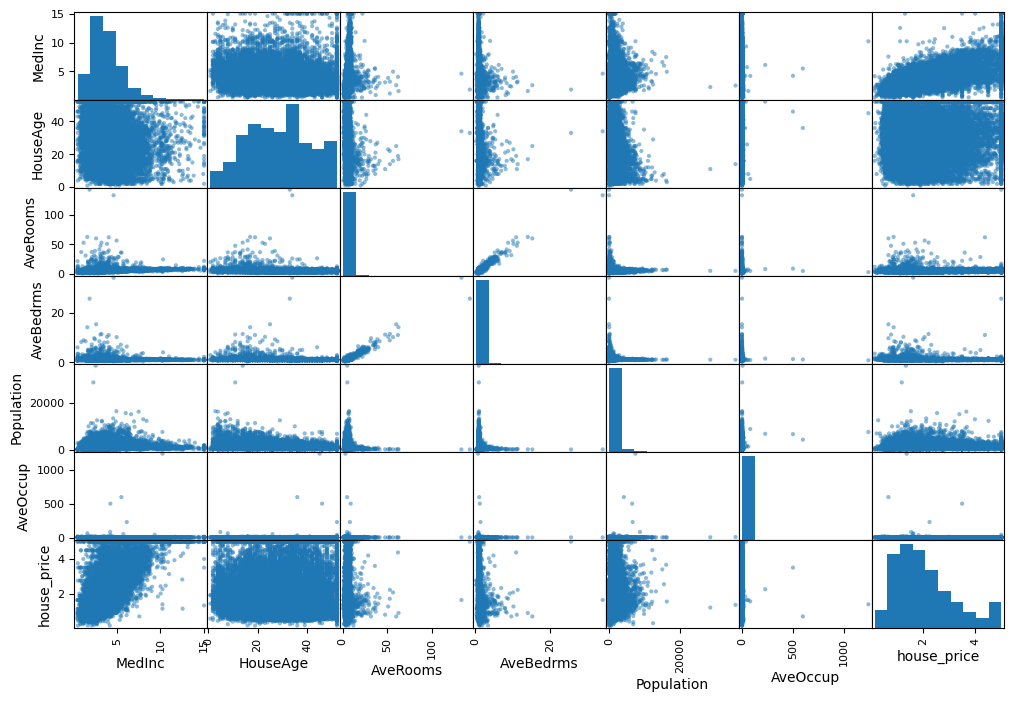

In [ ]:
attributes = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','house_price']
scatter_matrix(df1[attributes], figsize=(12,8))
plt.show()

In [ ]:
corr = df1.corr()
corr['house_price'].sort_values(ascending=True)

AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
HouseAge       0.105623
AveRooms       0.151948
MedInc         0.688075
house_price    1.000000
Name: house_price, dtype: float64

Pada eda yang dilakukan dilihat data menggunakan plot seperti histogram, correlation, dan scatter, pada histogram terlihat bahwa beberapa data tidak seimbang distribusinya lalu terlihat bahwa fitur medinc memiliki korelasi tertinggi dengan label.

### Assignment 3 : Lakukan Feature Egnineering (poin 15)
1. Lakukan teknik-teknik feature engineering dan analisa jika diperlukan teknik tertentu maka lakukan, jika tidak maka tuliskan alasannya. Misal tidak perlu missing value handling karena setelah dicek tidak ada missing value di dalam dataset.

In [ ]:
#Tambahkan cell jika dibutuhkan

In [ ]:
print(df1.duplicated().sum())

0


In [ ]:
print(df1.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
house_price    0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X)
X_std = scaler.transform(X)

In [ ]:
feats = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616


In [ ]:
feats = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
X = df1.drop('house_price', axis=1)
y = df1[['house_price']]

#Splitting
X_train, X_test,Y_train,Y_test = train_test_split(X,y,
                                                test_size = 0.25,
                                                random_state = 42)

In [ ]:
scaler = StandardScaler()

# Menerapkan standarisasi ke data pelatihan (train)
X_train.loc[:, feats] = scaler.fit_transform(X_train[feats])

# Menerapkan standarisasi yang sama ke data uji (test)
X_test.loc[:, feats] = scaler.transform(X_test[feats])

Pada feature engineering hanya dilakukan pengecekan duplikat, missing value yang ternyata tidak ada data duplikat dan missing, lalu tidak dilakukan outlier handling karena dirasa data outlier masih merupakan variasi alami pada data sehingga tidak dihandling, lalu dilakukan kolom drop, dan scalling dan data splitting untuk pemrosesan lebih lanjut.

### Assignment 4. Modelling PCA dengan libraries Sklearn atau from Scratch (Pilih salah satu saja) (Poin 60)
1. Modelling PCA dari sklearn atau PCA from scratch **(pilih salah satu saja)**
2. Lakukan pengecekan 95% distribusi dan plotting untuk nilai explained variance ratio (explained_variance_ratio) dengan cumulative explained variance (cumulative_explained_variance)
3. Pilih nilai PC diperoleh berapa banyak kolom untuk 95% distribusi
4. Lakukan Regresi atau klasifikasi, bandingkan evaluasinya dari data test untuk model yang dengan PCA maupun tanpa PCA -> Gunakan 1 model saja dari salah satu model diatas (boleh jika ditambahkan parameter model).

In [ ]:
#Tambahkan cell jika dibutuhkan

In [ ]:
from sklearn.decomposition import PCA #proses PCA

pca = PCA()
principal_components = pca.fit_transform(new_df)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [ ]:
print('Explained variance:', explained_variance_ratio)
print('Cumulative explained variance:', cumulative_explained_variance)

Explained variance: [0.32143202 0.21998297 0.17064897 0.16724616 0.10927036 0.01141951]
Cumulative explained variance: [0.32143202 0.54141499 0.71206396 0.87931013 0.98858049 1.        ]


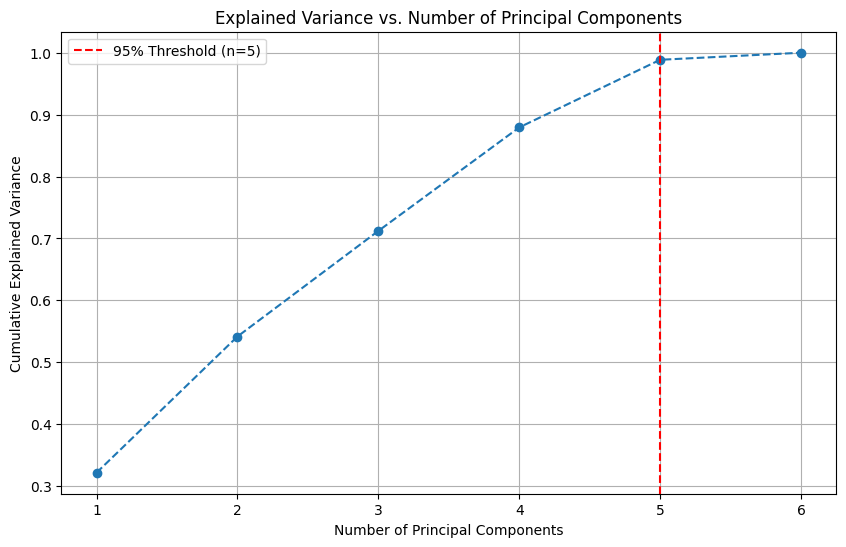

In [ ]:
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Plotting the explained variance with a horizontal line at 95%
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axvline(x=n_components_95, color='r', linestyle='--', label=f'95% Threshold (n={n_components_95})')
plt.title('Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=n_components_95)
principal_components = pca.fit_transform(new_df)
principal_components

array([[ 0.73451507, -0.75466996, -2.5357257 ,  0.22755377,  0.47814579],
       [ 0.67091118,  1.55949052, -1.8548091 , -0.15746496,  0.56199613],
       [ 0.87521127, -1.39521511, -2.06440083,  0.44508633,  1.15063488],
       ...,
       [-0.10398057,  0.06022522,  1.0105116 , -0.30046324, -1.07191883],
       [ 0.01684359, -0.1549465 ,  0.89110251, -0.29634707, -1.14177714],
       [ 0.05100032,  0.41618898,  0.82778716, -0.27533311, -0.83955922]])

In [ ]:
principal_components_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components_95 + 1)])

principal_components_df.head()

,PC1,PC2,PC3,PC4,PC5
0,0.734515,-0.754670,-2.535726,0.227554,0.478146
1,0.670911,1.559491,-1.854809,-0.157465,0.561996
2,0.875211,-1.395215,-2.064401,0.445086,1.150635
3,-0.023596,-1.513323,-1.257894,0.371274,0.956373
4,-0.096215,-1.754169,-0.423237,0.319646,0.829141


In [ ]:
X_train_pca, X_test_pca,Y_train_pca,Y_test_pca = train_test_split(principal_components_df,y,
                                                test_size = 0.25, #75% train : 25% test
                                                random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
model_pca = LinearRegression()
model_pca.fit(X_train_pca, Y_train_pca)

LinearRegression()

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred_pca = model_pca.predict(X_test_pca)
y_pred_train_pca = model_pca.predict(X_train_pca)

In [ ]:
y_pred = model.predict(X_test) #Model dari hasil BUKAN PCA
y_pred_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Data test (Unseen) RMSE DENGAN PCA : {}'.format(np.sqrt(mean_squared_error(Y_test_pca, y_pred_pca))))
print('Data test (Unseen) RMSE TANPA PCA : {}'.format(np.sqrt(mean_squared_error(Y_test, y_pred))))

Data test (Unseen) RMSE DENGAN PCA : 0.8201490614785001
Data test (Unseen) RMSE TANPA PCA : 0.7929136919453279


In [ ]:
from sklearn.metrics import r2_score
# R2 : Makin gede makin bagus (1-100 %)
# R2 : Makin gede maka makin linear Modelnya
print('Data test (Unseen) R-Square DENGAN PCA : {}'.format((r2_score(Y_test_pca, y_pred_pca))*100))
print('Data test (Unseen) R-Square TANPA PCA : {}'.format((r2_score(Y_test, y_pred))*100))

Data test (Unseen) R-Square DENGAN PCA : 49.16601575004669
Data test (Unseen) R-Square TANPA PCA : 52.486130552479715


Berdasarkan percobaan yang telah dilakukan terlihat bahwa pada perhitungan RMSE hasil non pca memiliki nilai yang lebih kecil (lebih baik) namun pada r squared hasil pca lebih kecil, hal ini mungkin karena tingkat kompleksitas data tidak kompleks dan juga jumlah kolom yang tidak banyak, lalu model non pca lebih bisa dalam menyesuaikan data pelatihan, namun dengan model pca mampu menangani masalah seperti multicollinearity, jadi penggunaan pca atau tidak dapat dapat disesuaikan lagi.